In [1]:
import numpy as np
np.random.seed(100)

import matplotlib.pyplot as plt
import time
import os
import json
%matplotlib inline

from keras.callbacks import LearningRateScheduler

Using TensorFlow backend.


In [2]:
import sys
sys.path.insert(0, '..')
sys.path.insert(0, '../src/')

# import evaluation_bk as evaluation
import evaluation
import training_utils
from src import TripletDataGenerator, TriNet
import data

## Load Data

In [3]:
P_param = 18
K_param = 4
img_dim = (256,128,3)

crop = True
flip = True

In [4]:
data_gen = data.TripletDataGenerator('duke', 'test')

Verification successful! All query have ground-truth samples.


In [6]:
data_gen.files_arr[:10]

[['/home/gong/research/data/duke/train/0478_c2_f0131176.jpg', 478, 2],
 ['/home/gong/research/data/duke/train/4627_c8_f0118638.jpg', 4627, 8],
 ['/home/gong/research/data/duke/train/0619_c2_f0163616.jpg', 619, 2],
 ['/home/gong/research/data/duke/train/2748_c5_f0191819.jpg', 2748, 5],
 ['/home/gong/research/data/duke/train/0283_c2_f0098718.jpg', 283, 2],
 ['/home/gong/research/data/duke/train/1587_c2_f0113229.jpg', 1587, 2],
 ['/home/gong/research/data/duke/train/3253_c5_f0141783.jpg', 3253, 5],
 ['/home/gong/research/data/duke/train/0682_c1_f0170369.jpg', 682, 1],
 ['/home/gong/research/data/duke/train/0242_c1_f0095216.jpg', 242, 1],
 ['/home/gong/research/data/duke/train/1259_c2_f0059236.jpg', 1259, 2]]

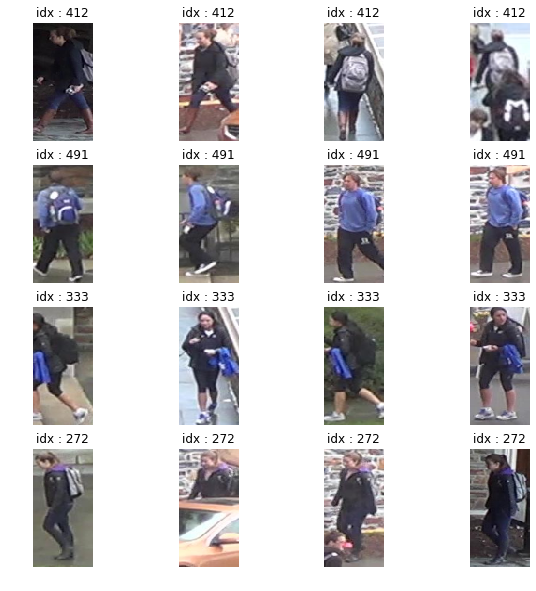

In [7]:
sample_batch, sample_labels = data_gen.sample(plot=True, height=4)

In [8]:
sample_batch.shape

(16, 128, 64, 3)

In [10]:
with open("/home/gong/research/data/cuhk03/meta.json") as f:
    meta = json.load(f)

In [11]:
with open("/home/gong/research/data/cuhk03/splits.json") as f:
    split = json.load(f)

In [13]:
len(meta['identities'])

1467

In [18]:
len(split[0]['gallery'])

100

In [19]:
len(split[0]['query'])

100

In [22]:
max(split[0]['trainval'])

1466